In [32]:
import librosa
import numpy as np
import os
import sys

In [33]:
from util.AudioClean import AudioClean

test_path = os.path.join(os.getcwd(), 'tests', 'WAVs (Raw Audio)', 'TrumpetEasySolos.mp3')
output_path = os.path.join(os.getcwd(), "trimmed_wav", "trimmedTrumpetSolo.wav")
display(os.getcwd())
display(output_path)
AudioClean.clean_audio(test_path, output_path)

'c:\\Users\\xlr9c\\OneDrive\\Documents\\GitHub\\dootdoot'

'c:\\Users\\xlr9c\\OneDrive\\Documents\\GitHub\\dootdoot\\trimmed_wav\\trimmedTrumpetSolo.wav'

In [62]:
# y is time series - values of waveform at indices indicating the sample number (time * sample rate)
y, sr = librosa.load(output_path)

# preprocessing - make sure y is to scale 1
gain_factor = np.mean(abs(y))
gain_factor = 1 / gain_factor
display(gain_factor)

y = y * gain_factor # amplify the audio

np.float32(29227.963)

In [63]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
display(tempo)

array([112.34714674])

array([], dtype=float32)

'No beats found'

0

array([-0.8986024 , -0.8858696 , -0.89759994, ..., -1.3978993 ,
       -1.1954638 , -0.90389735], dtype=float32)

np.float32(9.967175e-05)

np.int64(3251)

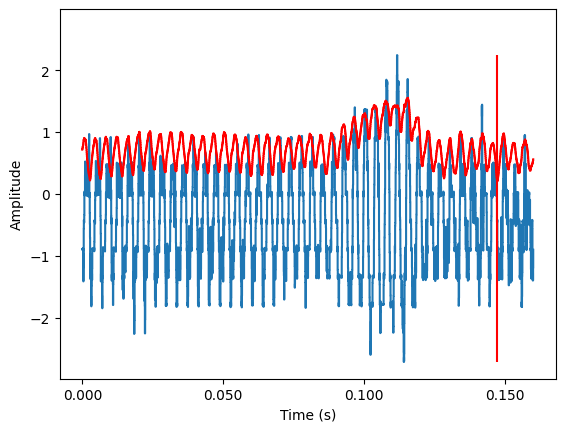

np.int64(13260)

array([-0.01660067,  0.32239467,  0.48833856, ..., -0.78442353,
       -0.42287043, -0.4513275 ], dtype=float32)

np.float32(9.6654614e-05)

np.int64(1496)

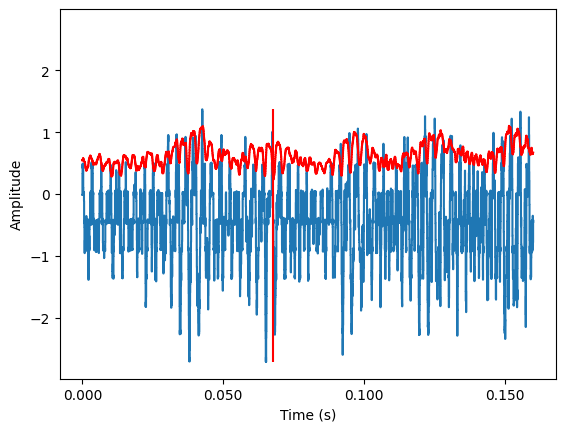

np.int64(24765)

array([ 0.5414287 , -0.02162798, -0.4899502 , ..., -0.9034523 ,
       -0.87365246, -0.9248297 ], dtype=float32)

np.float32(0.00014078186)

np.int64(231)

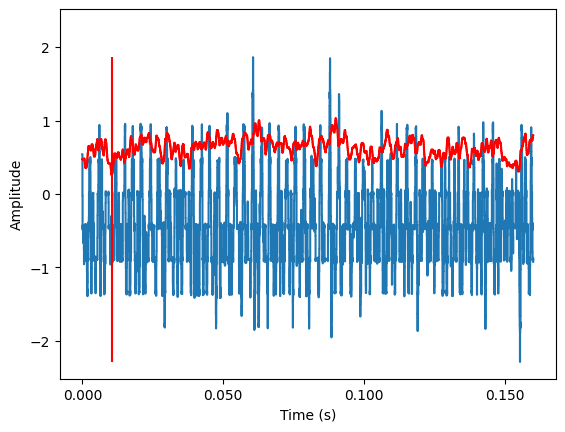

np.int64(35005)

array([ 0.494248  ,  0.3860411 ,  0.5348105 , ..., -0.87697077,
       -0.90555507, -0.8793198 ], dtype=float32)

np.float32(1.1629922e-05)

np.int64(3264)

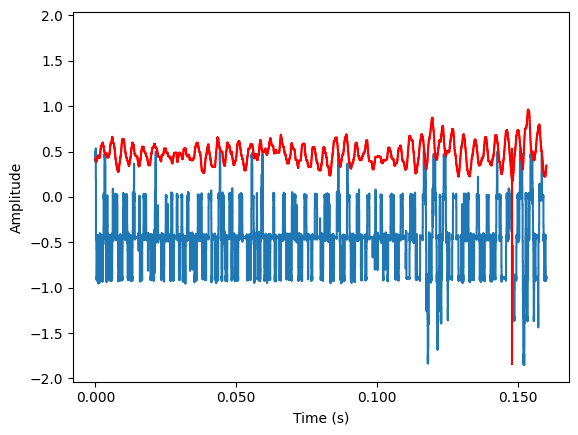

np.int64(48278)

array([-0.40441582, -0.5687756 , -0.91035163, ..., -0.4508188 ,
       -0.4389259 , -0.4555537 ], dtype=float32)

np.float32(7.921638e-06)

np.int64(3224)

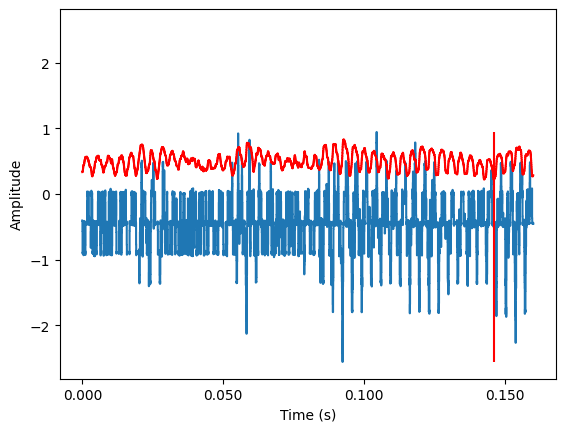

np.int64(61511)

array([-0.4329356 , -0.46141532, -0.42718762, ..., -0.59163743,
       -0.38336107, -0.5032668 ], dtype=float32)

np.float32(2.1598426e-05)

np.int64(163)

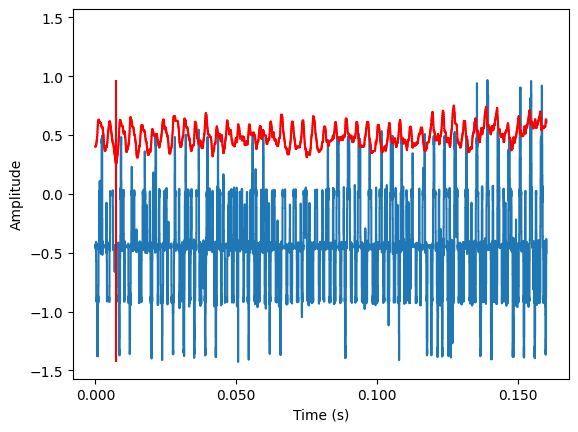

np.int64(71683)

array([-0.92276514, -0.84511316, -1.0216887 , ..., -0.4648523 ,
       -0.74226254, -0.95963424], dtype=float32)

np.float32(9.303937e-07)

np.int64(326)

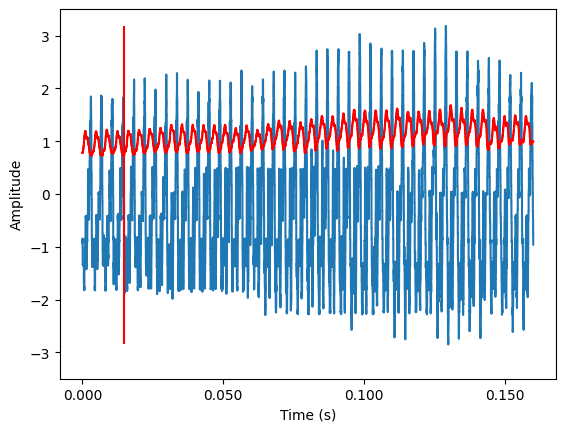

np.int64(82018)

array([-0.14245814, -0.46754912, -0.4160286 , ...,  0.42047542,
        0.4877414 ,  0.09721982], dtype=float32)

np.float32(1.54977e-05)

np.int64(1286)

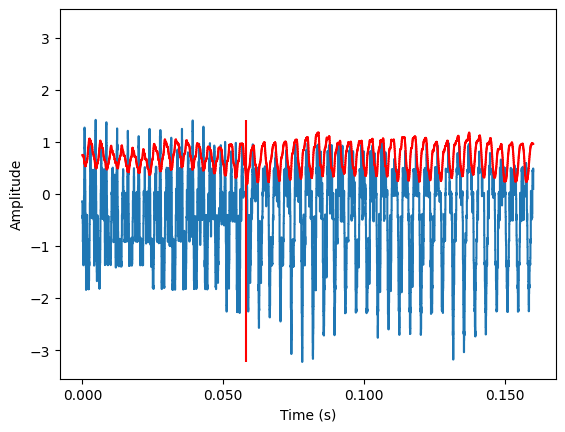

In [80]:
import IPython
import matplotlib.pyplot as plt

search_intervals = []
bounds = []

beats = 9

# convolution
window_size = 50
window = np.ones(window_size) / window_size
y_smooth = np.convolve(abs(y), window, mode='full')

for i in range(beats):
    samples_per_beat = (60 / tempo) * sr

    baseline = (60 / tempo) * i
    if (i > 0):
        display(bounds[i - 1])
        baseline = (60 / tempo) + (bounds[i - 1] / sr)
    
    search_interval = (baseline * sr) + [-samples_per_beat * 0.15, samples_per_beat * 0.15]
    search_intervals.append(search_interval)

    lower_bound = int(search_interval[0][0])
    upper_bound = int(search_interval[1][0])

    y_slice1 = y_smooth[lower_bound:upper_bound]
    y_slice = y[lower_bound:upper_bound]
    display(y_slice)

    if len(y_slice) > 0:
        display(min(abs(y_slice)))

        index = np.where(abs(y_slice1) == min(abs(y_slice1)))[0][0]
        display(index)

        plt.figure()
        librosa.display.waveshow(y_slice, sr=sr)
        librosa.display.waveshow(abs(y_slice1), sr=sr, color='r')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.vlines(index / sr, min(y_slice), max(y_slice), color='r')
        plt.show()

        bounds.append(lower_bound + index)

        display(IPython.display.Audio(y_slice, rate=sr))
    else:
        display("No beats found")
        bounds.append(0)

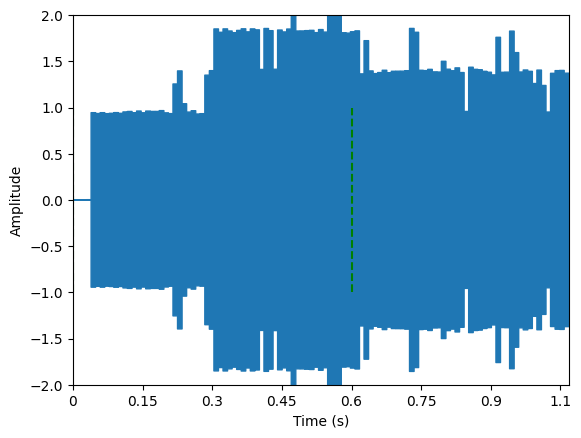

In [77]:
fig, ax = plt.subplots()
librosa.display.waveshow(y, sr=sr, ax=ax)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, beats * (60 / tempo))
plt.ylim(-2, 2)
# plt.vlines([(60 / tempo) * i for i in range(beats)], -0.25, 0.25, color='r', linestyle='--')
# plt.vlines([(search_intervals[i][j][0] / sr) for i in range(beats) for j in range(2)], -0.25, 0.25, color='y', linestyle='--')
plt.vlines([bound / sr for bound in bounds], -1, 1, color='g', linestyle='--')

In [ ]:
IPython.display.Audio(y, rate=sr)

In [71]:
first_time = 0
time_sum = 0
for bound in bounds:
    if bound != 0:
        time_sum += (bound - first_time) / sr
        first_time = bound

display(time_sum)
display(len(bounds))
new_bps = (len(bounds) - 1) / time_sum
new_bpm = new_bps * 60
display(new_bpm)

np.float64(4.231882086167801)

9

np.float64(113.4247103833335)

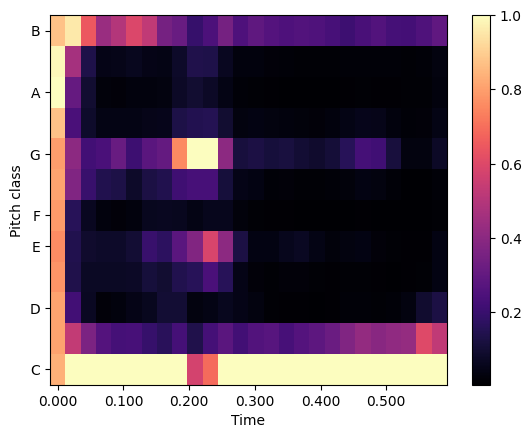

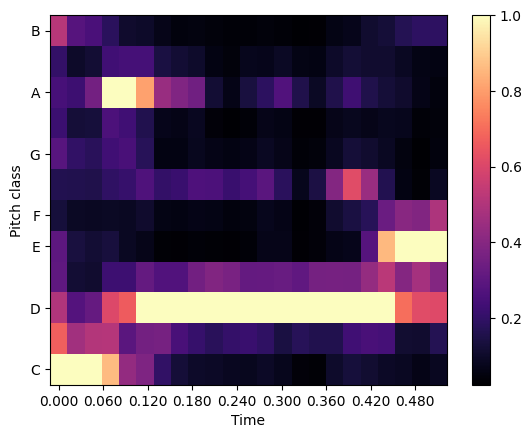

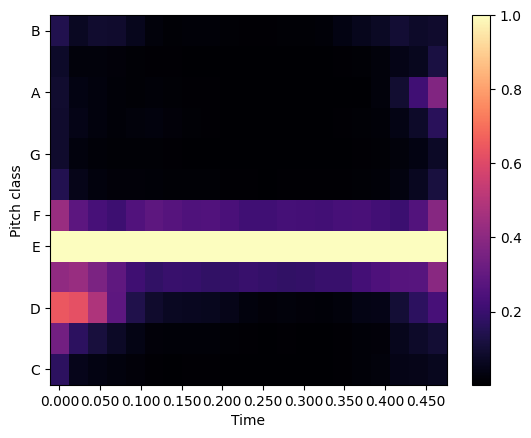

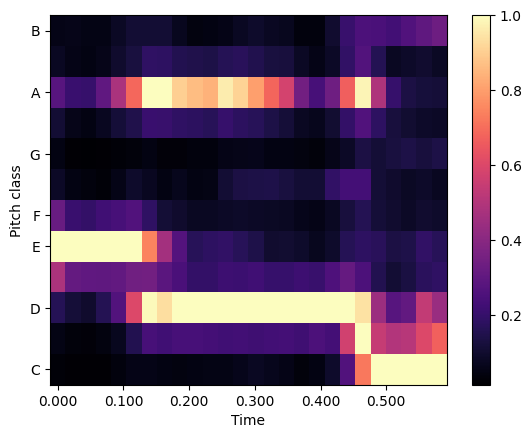

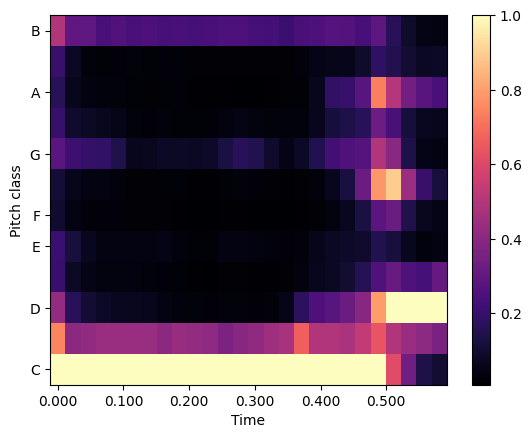

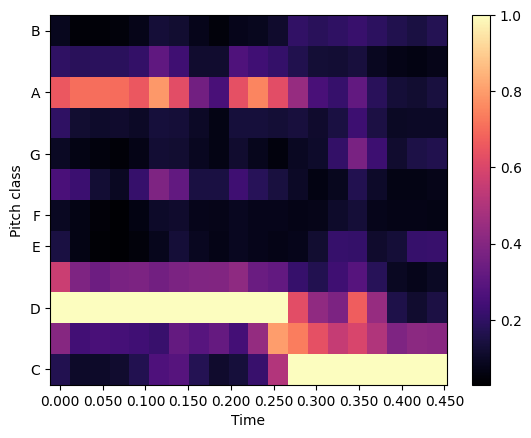

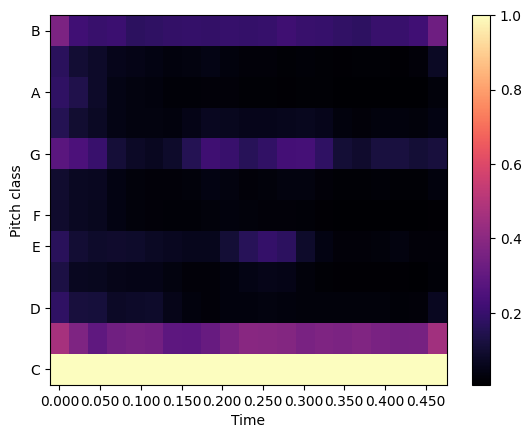

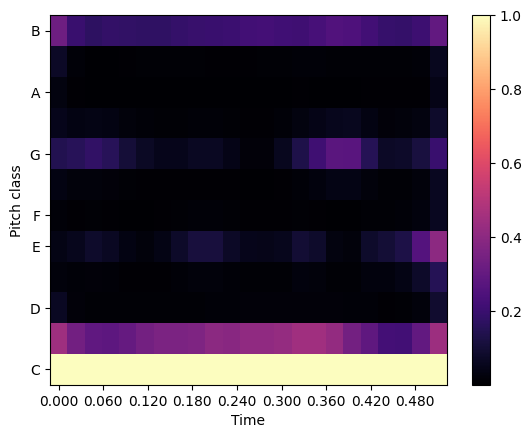

In [72]:
for i in range(len(bounds) - 1):
    lower_bound = bounds[i]
    upper_bound = bounds[i + 1]

    plt.figure()
    chroma = librosa.feature.chroma_stft(y=y[lower_bound:upper_bound], sr=sr)
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()

# chroma = librosa.feature.chroma_stft(y=y, sr=sr)
# librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
# plt.colorbar()

In [40]:
display(chroma[0])

array([0.8301456 , 1.        , 1.        , ..., 0.23089762, 0.2347058 ,
       0.32440227], dtype=float32)